<a href="https://www.kaggle.com/code/tiheli/decision-tree-cl-random-forest-cl-xgb?scriptVersionId=207628976" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
# Importing necessary modules for decision tree classification and visualization
# DecisionTreeClassifier: Used to create and train a decision tree classifier
# export_graphviz: Converts the decision tree into DOT format for visualization
# graphviz: A library to render the DOT format into readable tree diagrams
# train_test_split: Splits the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

In [3]:
# Loading the dataset and displaying the first few rows
# pd.read_csv: Reads the dataset from the specified CSV file
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head() # Displays the first 5 rows of the dataset to understand its structure and contents

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking the structure and data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Separating features and target variable
# y: The target variable 'output' is assigned to y for prediction purposes
# x: All other columns except 'output' are assigned to x as features
y = df['output']
x = df.drop("output", axis=1)

In [6]:
# Training a Decision Tree Classifier
# tree: A DecisionTreeClassifier instance is created
# model: The classifier is trained using the features (x) and the target (y)
# model.score: Evaluates the accuracy of the model on the same dataset it was trained on
tree = DecisionTreeClassifier()
model = tree.fit(x, y)
model.score(x, y)  # Calculate the accuracy on the training data

1.0

In [7]:
# Splitting Data into Training and Test Sets
# train_test_split: Splits the dataset into training and test subsets.
# - x_train, y_train: Data used to train the model (70% of the data).
# - x_test, y_test: Data used to evaluate the model's performance (30% of the data).
# random_state: Ensures reproducibility by setting a random seed.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16, train_size=0.70)

In [8]:
# Creating and Training the Decision Tree Classifier
# tree: Initializes the DecisionTreeClassifier model.
# fit: Trains the model using the training data (x_train and y_train).

tree = DecisionTreeClassifier()
model = tree.fit(x_train, y_train)

# Evaluating the Model's Performance
# score: Calculates the accuracy of the model on the test data (x_test and y_test).
# This shows how well the model predicts the target variable on unseen data.
model.score(x_test, y_test)

0.7582417582417582

In [9]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
# Predicting the output for a new sample based on feature values.
model.predict([[31,1,2,130,240,0,0,150,0,2,0,0,2]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

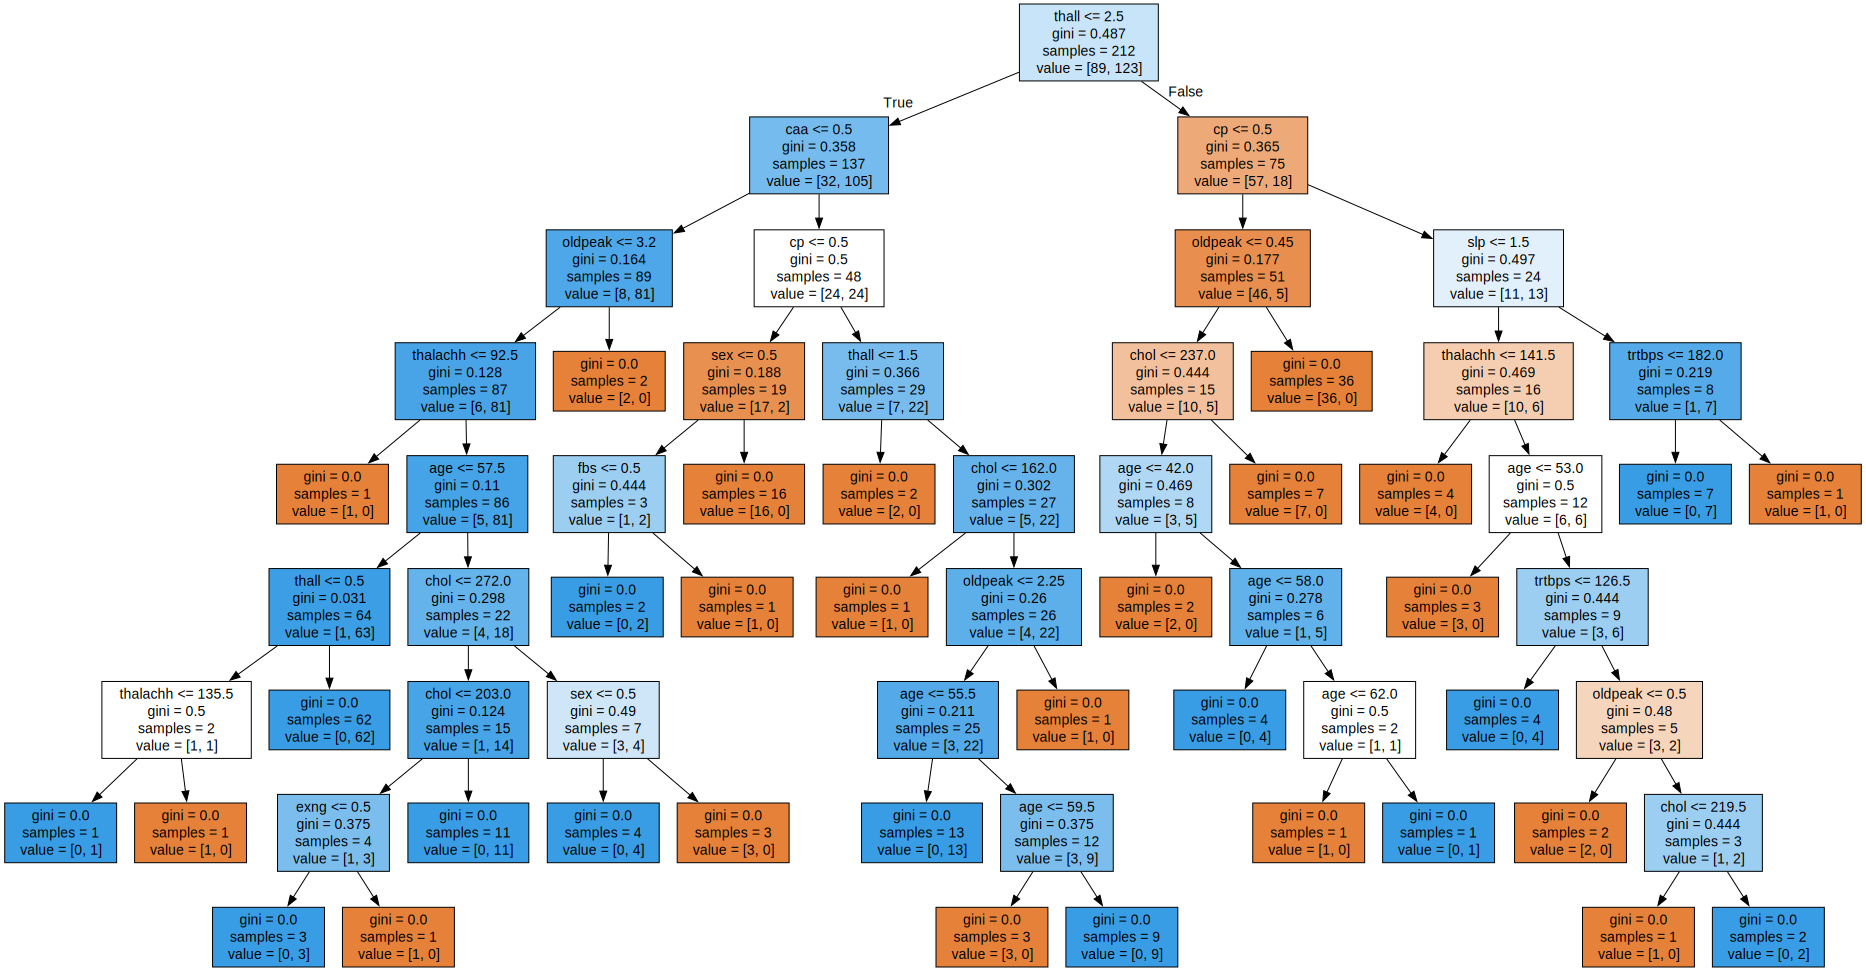

In [11]:
# Visualizing the decision tree using Graphviz, which helps understand the model's decision process.
dot=export_graphviz(model,feature_names=x.columns,filled=True)
view=graphviz.Source(dot)
view

In [12]:
# Importing the RandomForestClassifier from scikit-learn to build a random forest model, 
# which is an ensemble method that combines multiple decision trees for better accuracy.
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Creating a RandomForestClassifier model and fitting it on the data (x and y).
# The model is then evaluated on the same data (x and y) to check its performance.
forest=RandomForestClassifier()
model=forest.fit(x,y)
model.score(x,y)

1.0

In [14]:
# Creating a RandomForestClassifier with specific hyperparameters: 
# - n_estimators=400 (the number of trees in the forest)
# - max_depth=4 (the maximum depth of each tree in the forest).
# The model is then trained on the training data (x_train and y_train).
# Finally, the model's performance is evaluated on the test data (x_test and y_test).
forest=RandomForestClassifier(n_estimators=400,max_depth=4)
model=forest.fit(x_train,y_train)
model.score(x_test,y_test)

0.8461538461538461

In [15]:
# Importing the XGBoost library, which is a powerful machine learning algorithm 
# often used for classification and regression tasks. 
# XGBoost is known for its performance and efficiency in handling large datasets.
import xgboost as xgb

In [16]:
# Splitting the dataset into training and testing sets using a 70-30 split.
# This is done to evaluate the model's performance on unseen data (test set).
# 'random_state=42' ensures reproducibility of the split, and 'train_size=0.70' means 70% of the data is used for training.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.70)

In [17]:
# Training a Decision Tree Classifier using the training data (x_train, y_train).
# Then, evaluating the model's accuracy on the test data (x_test, y_test) using the 'score' method.
# This returns the mean accuracy of the model on the test set.
dtT=DecisionTreeClassifier()
model=dtT.fit(x_train,y_train)
model.score(x_test,y_test)

0.7142857142857143

In [18]:
# Training a Random Forest Classifier with 200 trees (n_estimators=200) 
# and a maximum depth of 4 for each tree using the training data (x_train, y_train).
# After training, the model is evaluated on the test set (x_test, y_test) using the 'score' method, 
# which provides the mean accuracy of the model on the test data.
rfT=RandomForestClassifier(n_estimators=200,max_depth=4)
model=rfT.fit(x_train,y_train)
model.score(x_test,y_test)

0.8241758241758241

In [19]:
# Training an XGBoost Classifier using the training data (x_train, y_train).
# The model is then evaluated on the test set (x_test, y_test) using the 'score' method,
# which returns the mean accuracy of the model on the test data.
xgbT=xgb.XGBClassifier()
model=xgbT.fit(x_train,y_train)
model.score(x_test,y_test)

0.8131868131868132

In [20]:
# Randomly selects a sample from the dataframe (df) and removes the "output" column.
# The remaining features (input variables) are stored as an array (values) in the variable 'human'.
human=df.sample().drop("output",axis=1).values

In [21]:
# Uses the trained model to predict the class label for the randomly selected sample stored in 'human'.
# The prediction is based on the input features of the 'human' sample.
model.predict(human)

array([1])